![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [5]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [6]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [7]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [9]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [10]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7812262183677007

In [11]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [12]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.143030,0.101960,0.024454,0.029938,0.354552,0.138830,0.030787,0.490140,0.073159,0.101339,...,0.025069,0.063208,0.000000,0.362818,0.056648,0.008970,0.017522,0.202605,0.033989,0.018117
4,0.122624,0.085786,0.024213,0.084795,0.370949,0.216657,0.080359,0.515684,0.062976,0.067019,...,0.024734,0.060935,0.000477,0.149703,0.058190,0.014248,0.020099,0.204794,0.030438,0.018506
5,0.151364,0.110284,0.013762,0.075334,0.304837,0.448736,0.021010,0.611544,0.081741,0.169121,...,0.044538,0.261372,0.000000,0.335987,0.128505,0.001016,0.048658,0.423242,0.052693,0.025351
6,0.154448,0.125772,0.020991,0.064124,0.340779,0.140892,0.009133,0.632038,0.068287,0.063631,...,0.131074,0.088418,0.000000,0.197224,0.132208,0.001432,0.039743,0.269385,0.077607,0.017862
7,0.175143,0.210069,0.035476,0.032505,0.313850,0.243150,0.021793,0.427885,0.079781,0.143879,...,0.023859,0.090359,0.000048,0.205117,0.241663,0.002634,0.018403,0.259465,0.021569,0.017585


# EDA


In [13]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [15]:
print(dataTraining.shape)
display(dataTraining.head(2))
print(dataTesting.shape)
display(dataTraining.head(2))

(7895, 5)


,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6


(3383, 3)


,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6


,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


Text(0, 0.5, 'Frequencia')

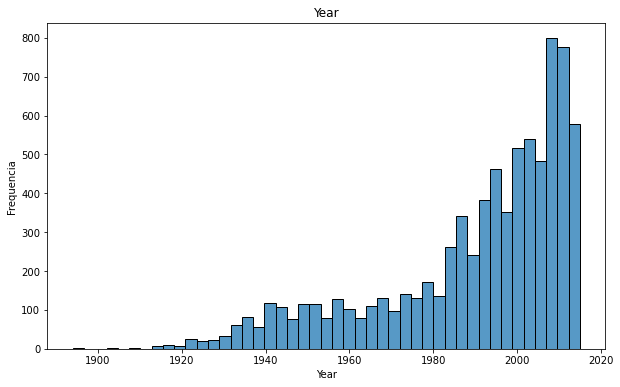

In [16]:
display(dataTraining.describe())
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = dataTraining['year'])
plt.title('Year')
plt.xlabel('Year')
plt.ylabel('Frequencia')

,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


Text(0, 0.5, 'Frequencia')

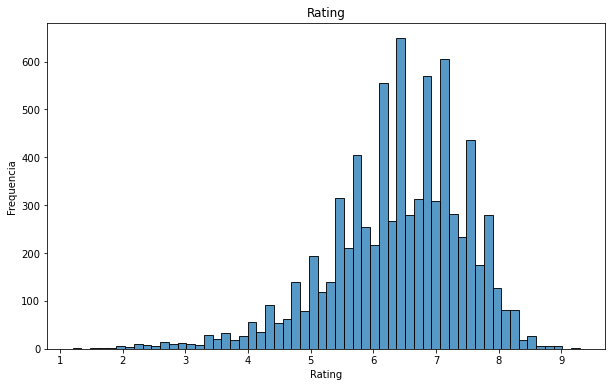

In [17]:
display(dataTraining.describe())
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = dataTraining['rating'])
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Frequencia')

In [18]:
dataTraining.head(2)

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6


In [19]:
dataTraining["genres"] = dataTraining['genres'].map(lambda x: eval(x))

,index,0
0,Drama,3965
1,Comedy,3046
2,Thriller,2024
3,Romance,1892
4,Crime,1447
5,Action,1303
6,Adventure,1024
7,Horror,954
8,Mystery,759
9,Sci-Fi,723


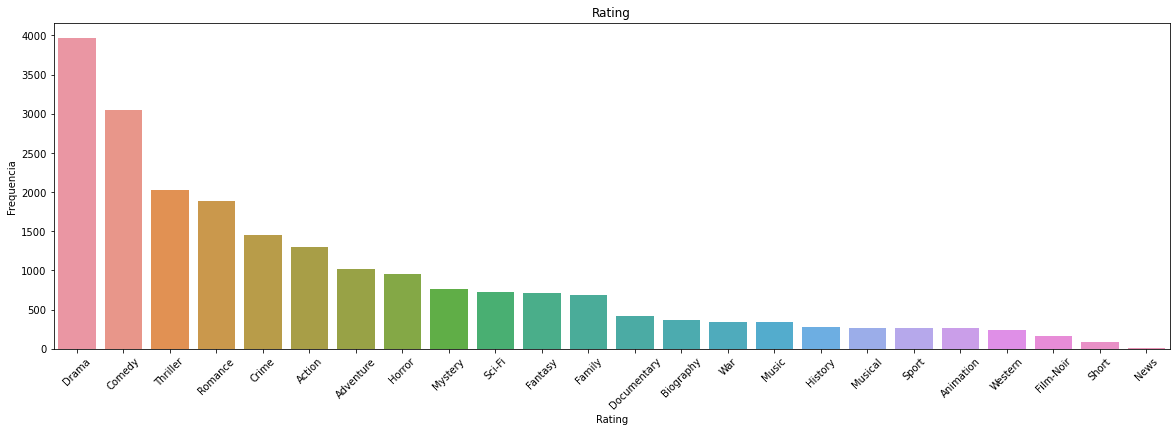

In [20]:
genre_count = pd.DataFrame(pd.value_counts([x for row in dataTraining["genres"].values.tolist() for x in row ])).reset_index()

display(genre_count)
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(data=genre_count, x="index", y= 0)
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Frequencia')
plt.xticks(rotation = 45);

# Preprocesamiento

In [21]:

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining.drop(columns=["genres"]), y_genres, test_size=0.20, random_state=42)

In [22]:
import nltk
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words]

cv = CountVectorizer( lowercase = True, ngram_range=(3,3),analyzer=split_into_lemmas, stop_words="english")

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
cv

TfidfVectorizer(ngram_range=(3, 3), stop_words='english')

In [63]:
#tfidf = TfidfVectorizer(lowercase=True)
X_train_cv

<6316x29129 sparse matrix of type '<class 'numpy.float64'>'
	with 532365 stored elements in Compressed Sparse Row format>

In [70]:
X_train_cv.shape

(6316, 29129)

# Modelos

## Random Forest

In [104]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words]

cv = TfidfVectorizer( lowercase = True, ngram_range=(1,3),analyzer=split_into_lemmas, stop_words="english",strip_accents = 'unicode')

X_train_cv = cv.fit_transform(X_train["plot"])
X_test_cv = cv.transform(X_test["plot"])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rf = OneVsRestClassifier(RandomForestClassifier(random_state=10, n_estimators= 200, n_jobs=-1))

rf.fit(X_train_cv, y_train_genres)

y_pred = rf.predict_proba(X_test_cv)

roc_auc_score(y_test_genres, y_pred, average='macro')

0.8451976380837976

100
120
140
160
180
200
220
240
260
280
max value 0.8454724538473304
max arg 220


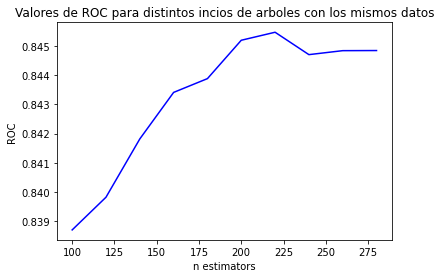

In [118]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


roc_arr = []

values = np.arange(100,300,20)
for n in values:
    print(n)

    rf = OneVsRestClassifier(RandomForestClassifier(random_state=10, n_estimators= n, n_jobs=-1))
    rf.fit(X_train_cv, y_train_genres)
    y_pred = rf.predict_proba(X_test_cv)
    roc = roc_auc_score(y_test_genres, y_pred, average='macro')

    roc_arr.append(roc)


print("max value {}".format(roc_arr[np.argmax(roc_arr)]))
print("max arg {}".format(values[np.argmax(roc_arr)]))

plt.title('Valores de ROC para distintos incios de arboles con los mismos datos')
plt.plot(values, roc_arr, 'b',)
plt.ylabel('ROC')
plt.xlabel('n estimators')
plt.show()

# XGBoost

In [55]:
from xgboost import XGBClassifier

xg = OneVsRestClassifier(XGBClassifier(n_estimators= 100, max_depth=2))

xg.fit(X_train_cv, y_train_genres)

y_pred = xg.predict_proba(X_test_cv)

roc_auc_score(y_test_genres, y_pred, average='macro')

0.843265497101689

1
2
3
4
5
6
7
8
9
max value 0.8479019476548292
max arg 1


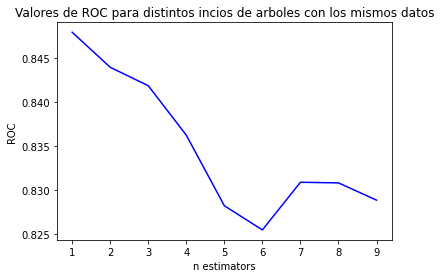

In [131]:
from xgboost import XGBClassifier

roc_arr = []

values = np.arange(1,10,1)
for n in values:
    print(n)

    xg = OneVsRestClassifier(XGBClassifier(n_estimators= 180, max_depth=n))
    xg.fit(X_train_cv, y_train_genres)
    y_pred = xg.predict_proba(X_test_cv)

    roc = roc_auc_score(y_test_genres, y_pred, average='macro')

    roc_arr.append(roc)


print("max value {}".format(roc_arr[np.argmax(roc_arr)]))
print("max arg {}".format(values[np.argmax(roc_arr)]))

plt.title('Valores de ROC para distintos incios de arboles con los mismos datos')
plt.plot(values, roc_arr, 'b',)
plt.ylabel('ROC')
plt.xlabel('n estimators')
plt.show()

## Combinado

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier

estimators = [
    ("cross", make_pipeline(CountVectorizer( lowercase = True, ngram_range=(1,3),analyzer=split_into_lemmas, stop_words="english",strip_accents = 'unicode'), XGBClassifier(n_estimators= 180, max_depth=1))),
    ("tfid", make_pipeline(TfidfVectorizer(lowercase = True, ngram_range=(1,3),analyzer=split_into_lemmas, stop_words="english",strip_accents = 'unicode'), RandomForestClassifier(random_state=10, n_estimators= 220, n_jobs=-1)))
]

clf = OneVsRestClassifier(StackingClassifier(estimators=estimators, final_estimator = LogisticRegression()))
clf.fit(X_train["plot"], y_train_genres)


y_pred = clf.predict_proba(X_test["plot"])
roc_auc_score(y_test_genres, y_pred, average='macro')

0.8313767476381998

In [134]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier

estimators = [
    ("cross", make_pipeline(CountVectorizer( lowercase = True, ngram_range=(1,3),analyzer=split_into_lemmas, stop_words="english",strip_accents = 'unicode'), XGBClassifier(n_estimators= 180, max_depth=1))),
    ("tfid", make_pipeline(TfidfVectorizer(lowercase = True, ngram_range=(1,3),analyzer=split_into_lemmas, stop_words="english",strip_accents = 'unicode'), RandomForestClassifier(random_state=10, n_estimators= 220, n_jobs=-1)))
]

clf = OneVsRestClassifier(VotingClassifier(estimators=estimators, voting="soft", n_jobs=-1))
clf.fit(X_train["plot"], y_train_genres)


y_pred = clf.predict_proba(X_test["plot"])
roc_auc_score(y_test_genres, y_pred, average='macro')

0.8741893913985875

# Salida

In [101]:
le.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'], dtype=object)

In [135]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = dataTesting['plot']

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [136]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.121909,0.089353,0.016263,0.010124,0.423598,0.079832,0.004828,0.521283,0.039952,0.100518,...,0.009208,0.061156,0.000001,0.419632,0.043054,0.015429,0.011612,0.215133,0.017591,0.008139
4,0.187572,0.041696,0.043432,0.127978,0.373786,0.373690,0.092703,0.612877,0.077116,0.072517,...,0.022735,0.030158,0.015078,0.090079,0.030585,0.056271,0.011400,0.226024,0.065756,0.006982
5,0.049187,0.024310,0.004763,0.063866,0.119626,0.650765,0.007979,0.722563,0.004810,0.032613,...,0.002953,0.203246,0.001607,0.183034,0.060650,0.000147,0.004705,0.393017,0.059135,0.033271
6,0.126152,0.080559,0.000597,0.026953,0.254951,0.069323,0.011945,0.675972,0.038798,0.025473,...,0.013934,0.141118,0.000008,0.176876,0.126003,0.002343,0.014376,0.307341,0.032903,0.007457
7,0.091533,0.096291,0.031877,0.018687,0.190822,0.104358,0.009487,0.319711,0.039141,0.163259,...,0.035064,0.149978,0.000006,0.119638,0.638502,0.000142,0.005447,0.238964,0.010657,0.004318
